By Amy Weng

Word2Vec Continuous Skip-Gram Model Word Embedding and Visualization

https://radimrehurek.com/gensim/models/word2vec.html

In [32]:
import pandas as pd
from words import remove_stopwords
from gensim.scripts import word2vec2tensor
from gensim.models import Word2Vec
from gensim.models import Phrases

def embed(df,title):
    data = df.text.values.tolist()
    # preprocess and remove stopwords
    data = remove_stopwords(data)
    # Train a bigram detector.
    bigram_transformer = Phrases(data)
    # Train a skip-gram model with the bigram detector 
    model = Word2Vec(bigram_transformer[data], min_count=5,sg=1)
    # save model so we can reload later  
    model.save('/home/rapiduser/Materials/embeddings/'+title+'.model')
    # save model in a format that can be converted to tensor TSV 
    model.wv.save_word2vec_format('/home/rapiduser/Materials/embeddings/tensor/'+title+'.model')
    return(model)

def similar(model,word,num):
    if word in model.wv.key_to_index.keys():
        words = []
        first = 0
        score = 0
        for w, s in model.wv.most_similar(word,topn=num):
            if first == 0:
                score = s
                first += 1
            words.append(w)
            # words.append((w,s))
        # print(word + ': '+' '.join(words))
        # print('The most similar n-gram has cosine distance '+str(score))
        return ' '.join(words)

def comparePair(model,word1,word2):
    if word1 and word2 in model.wv.key_to_index.keys():
        # print('Cosine similarity between ' + word1 + ' and ' + word2 + ': ',model.wv.similarity(word1, word2))
        return model.wv.similarity(word1, word2)
    return None

def tensor(f_name):
    word2vec2tensor.word2vec2tensor(
        '/home/rapiduser/Materials/embeddings/tensor/'+f_name+'.model',
        '/home/rapiduser/ECBC-21-22/Text_Files/Embeddings TSV/'+f_name,
        binary=False)

In [ ]:
myCSV = '/home/rapiduser/Materials/topic model/publica/eic_monopoly.csv'

readFile = pd.read_csv(myCSV)

# read text information into a dataframe
publica_eic_monopoly = embed(readFile,'publica_eic_monopoly')
tensor('publica_eic_monopoly')

In [28]:
publica = 'abroad|act|administrators|admiral|adventurers|africa|african|aid|ally|ambaador|ambassador|amboyna|amsterdam|argier|army|austerity|authority|bank|bankrupt|bankrupts|banks|bantam|bavaria|bill|bills|body politic|bond|britain|bullion|bullionist|calico|calicoes|captain|cargo|cargoes|cent|cents|charles|charters|china|chocolate|christiandom|cinnamon|citizens|civil war|civilian|clothier|clothiers|cloths|coffee|coin|coined|commerce|commercial|commiioner|commissioner|commissioners|commodities|commodity|commonwealth|companies|company|constitution|consumables|consume|consumer|consuming|consumption|controversies|controversy|conume|conumption|copper|corn|corporate|corporation|council|councils|country|court|courten|courts|credit|creditor|creditors|crisis|crisis|currency|debt|debtor|decoctor|decree|decrees|defendant|dutch|duties|east india company|east indies|east-india company|east-india-company|eat-india company|economic|economy|emperor|empire|employment|enemy|england|england|estate|europe|european|exchange|exchequer|exportation|exported|extortion|factories|factory|fih|fihing|fiscal|fish|fishery|fishing|foreign|free trade|germany|ginger|gold|goods|government|governor|governors|grant|grants|gunpowder|herring|herrings|hillings|hollanders|holy roman empire|house of commons|house of lords|importation|imported|income|indenture|india|india|indian|indies|indonesia|industry|interest|interest rate|interest rates|interet|interloper|interlopers|ireland|james|joint-stock|king|kingdom|kingdom|kings|land|law|laws|license|licenser|licensing|london|lord|low countries|majesties|majesty|majeties|manufacture|manufacturers|manufactures|manufacturing|market|markets|mary|massacre|mercantile|merchandise|merchant|merchants|military|mines|mint|minted|mogul|money|moneys|monies|monopolie|monopolies|monopolion|monopolist|monopolium|monopolization|monopolize|monopolizer|monopolizes|monopoly|monopolion|monopolye|monopolyes|monoply|monopolise|monopolising|monopolists|monopolizers|monopolised|monoopolies|monopolits|monopolers|monopoliing|mughal|nation|national|naval|navigation|navy|negroes|netherlands|netherlands|nets|oppression|parliament|parliament|pay|pence|pences|pepper|petitioner|petitioners|petre|phaulkon|pirate|pirates|plaintiff|plantations|planters|pleads|politic|political|pound|pounds|power|price|prices|prince|princes|privileges|proclamation|proecutor|proecutors|profitable|prohibition|property|proprietors|protection|provincial|public|publicke|queen|quote|restoration|revenue|revenues|revolution|ruler|salt|saltpetre|scandal|scandalous|scotland|seamen|shilling|shillings|shipping|ships|siam|siam|silk|silver|solicitors|spain|spanish|spending|spices|spices|sterling|stock|strength|stuart|subject|substance|supply|syam|taxation|taxes|tea|textiles|tobacco|tories|tory|trade|tradesmen|trading|traffic|traffique|treasure|treaties|treatise|treatises|treaty|truces|tunis|turkish|unprofitable|usurer|usury|war|whig|whigs|william|wood|woollen|work'
religio = 'abnegatio|abraham|absolution|abundance|adam|adultery|almighty|altar|anabaptists|anathema|annihilate|anoint|anointing|antichrist|apocalypse|apostle|archangel|armageddon|arrogant|ascension|atone|atonement|avarice|baptism|bathsheba|bible|biblical|bishop|bishop|bishops|blasphemy|bless|blessed|blessing|born-again|bread|brother|caesar|calvinist|candles|canon|catholic|cessans|chalice|chapel|chaplain|charity|cheat|cheating|cherub|christ|christian|christianity|chrit|church|cleansing|clergy|coming|commandments|communion|condemn|condemnation|confess|confession|congregation|conscience|consecration|contempt|contrite|contrition|conviction|covenant|create|creation|creed|cross|crown|cuckold|curse|damask|damn|damnation|damned|david|day|deacon|death|deceit|deceitful|deceive|deceive|defile|defiled|delilah|demon|depravity|desire|desires|destruction|deuteronomy|devil|disciple|disciples|disobey|divine|doctrine|ecumenical|endure|entice|enticed|epistle|eternal|evangelical|evangelicalism|eve|evil|excommunication|exile|exodus|faith|false|falsehood|fellowship|forgive|forgiveness|fortune|fraud|freedom|fundamental|generation|genesis|gentile|gluttony|god|godly|gospel|grace|greed|green|grievance|guilt|guilty|hallelujah|heaven|hebrew|hebrews|hell|heresy|heresy|holiness|holy|human|hypocrisy|incest|indulgence|indulgent|integrity|isaiah|james|jehovah|jesus|job|judaism|judgment|justification|justify|knowledge|lechery|leviticus|lie|lies|liturgy|lord|lucifer|lucrum|luke|lust|lustful|lustfully|luxury|manifestation|mark|mass|matthew|mendicancy|messiah|minister|ministry|mission|missionary|modesty|moral|moses|obedience|obey|offering|offerings|ordained|ordinance|ordinate|ordination|orthodox|pagan|paganism|pagans|palace|papacy|papist|parable|parables|parish|parishioner|passover|pastor|penance|perfect|persecution|peter|pleasant|pope|popery|pray|prayer|predestination|prejudicial|presbyterian|presbyterians|pride|priesthood|prodigal|prodigality|prohibition|prophecy|prophet|protestant|proverb|proverbs|providence|psalm|psalms|purgatory|radiance|rapture|reap|reconcile|reconciliation|redeem|redeemed|redemption|reform|reformed|reincarnate|reincarnation|reject|rejected|rejoice|rejoiced|religion|render|repent|resurrect|resurrection|revelation|rich|righteous|righteousness|ritual|roman|rome|root|sabbath|sacrament|sacred|sacrifice|sacrifices|saint|salvation|samaritan|samson|samuel|sanctified|sanctify|sanctuary|satan|satanic|satanism|save|saved|saved|savior|scripture|scriptures|second|secure|security|self-denial|sermon|simony|sin|sinful|sins|sister|slave|slaves|sloth|soul|sown|spirit|splendor|splendor|station|stations|sumptuary|sun|supper|tempt|ten|tenant|tenants|testament|theft|thrive|timothy|tongues|tower|transgression|tribulation|trinity|trust|truth|twelve|unfaithful|union|universal|unnatural|vanity|velvet|venial|virgin|vision|vulgate|wealth|whore|wicked|wickedness|wine|wise|witness|word|words|worship|zion'
medica = 'ablespy|ague|anemia|aphonia|apoplexy|apothecaries|apothecary|asthma|asthma|atrophy|bad|bezoar|bile|bilious remitting fever|biliousness|bleed|bleeding|blood|bloody flux|body|brain|brain fever|break bone|breathing|camp fever|cancer|canker|catarrh|chlorosis|chlorosis|cholera infantum|circulate|circulation|clots|clotting|cold|constitution|consume|consumption|contamination|corpora|corpus|corrupt|corruptio|corruption|corruptionem|cough|creeping paralysis|cure|cured|dead|death|debility|decay|decay|deceased|defect|degenerate|degeneration|destroy|diabetes|diagnosis|diarrhea|disease|dissolution|distemper|drinks|dropsy|dry|dying|dysentery|dyspepsia|edema|enfeeblement|envy|epilepsy|evacuation|exercise|faculties|falling sickness|fatal|fatality|fever|fiber|fog|french pox|gangrene|grip|grippe|healthy|heart|heart|hemorrhage|hepatitis|herb|herbs|hot|hysteria|illness|impairment|inanition|indigestian|influenza|insane|jaundice|jealousy|languish|leech|leeches|liver|lung|malaria|malnutrition|marasmus|medical|medicine|medicines|melancholic|melancholy|miasma|milk sickness|mind|moist|morbid|mortal|mortality|mortification|mouth|necrosis|nerves|nervous|nostalgia|opiate|opium|paralysis|patient|patients|perversion|perverto|phlegm|phthisis|phyician|phyicians|physician|physicians|plague|plague|pox|prognosis|putrid|putrid|quinsy|remedies|remedy|sana|sane|sanguine|scrumpox|sick|sickness|smells|smoke|sores|spirit|spoil|spoiling|stomach|stroke|supple|surgeon|surgeons|swelling|syphilis|tetrid|therapeutic|tuberculosis|ulcer|unhealthy|unwholesome|upset|vein|vein|vessels|vice|vita|vital|vitiare|vitiation|vitium|vomit|waste|waste|wasting|wasting|wate|wating|wholesome|wintergreen|zodiac'
consumption = 'consumption|consume|consuming|consumed|consumer|consumers|conumption|conume|conuming|conumed|conumer|conumers'
monopoly = 'monopolie|monopolies|monopolion|monopolist|monopolium|monopolization|monopolize|monopolizer|monopolizes|monopoly|monopolion|monopolye|monopolyes|monoply|monopolise|monopolising|monopolists|monopolizers|monopolised|monoopolies|monopolits|monopolers'
bodyPolitic = 'body_politic|body_politick|bodies_politic|bodies_politick'
blood = 'blood|bleeding|bled|bleed'
corrupt = 'corrupt|corruption|corrupting|corrupter|corrupted|corruptions'

In [33]:
import os 
import re 
df = pd.DataFrame(columns=('year','similar','publica ratio','religio ratio','medica ratio'))
for year in range(1660,1700+1):
    similarWords = ''
    if (str(year)+'_publica_eic.model') in os.listdir('/home/rapiduser/Materials/embeddings'):
        model = Word2Vec.load('/home/rapiduser/Materials/embeddings/' + str(year)+'_publica_eic.model')
        for term in corrupt.split('|'):
            if similar(model,term,50) != None:
                similarWords += similar(model,term,100)
        if similarWords != '':
            total = len(similarWords.split(' '))
            p = len(re.findall(publica, similarWords))/total
            r = len(re.findall(religio, similarWords))/total
            m = len(re.findall(medica, similarWords))/total
            data = {'year':year,'similar':similarWords,
                'publica ratio':p,'religio ratio':r,
                'medica ratio':m}
            df = df.append(data,ignore_index=True)
outfile = '/home/rapiduser/ECBC-21-22/Text_Files/cosine similarities/eic_corruption_ratios.csv'
df.to_csv(outfile)

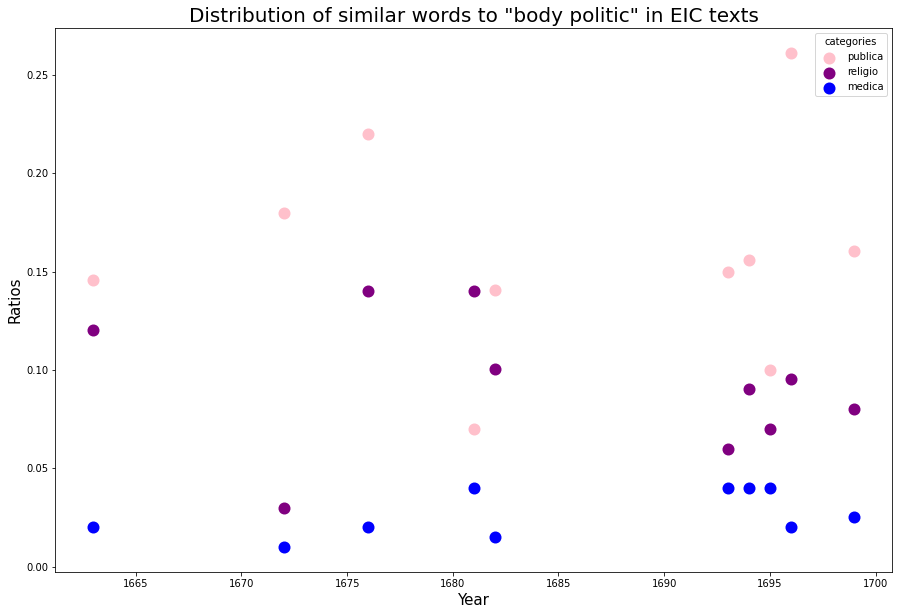

In [36]:
data = pd.read_csv('/home/rapiduser/ECBC-21-22/Text_Files/cosine similarities/eic_bodyPolitic_ratios.csv')
import matplotlib.pyplot as plt 
x1= data['year'].tolist()
y1 = data['publica ratio'].tolist()
y2 = data['religio ratio'].tolist()
y3 = data['medica ratio'].tolist()
plt.figure(figsize = (15, 10))
plt.scatter(x1, y1, c ="pink", linewidths = 2, s = 100)
plt.scatter(x1, y2, c ="purple", linewidths = 2, s = 100)
plt.scatter(x1, y3, c ="blue", linewidths = 2, s = 100)
names = ['publica','religio','medica']
plt.legend(labels=names,title="categories")
# plt.title('Cosine similarities of "corruption" to different lexicons in EIC texts', fontsize=20)
plt.title('Distribution of similar words to "body politic" in EIC texts', fontsize=20)

plt.xlabel("Year",fontsize=15)
plt.ylabel("Ratios",fontsize=15)
plt.show()

In [ ]:
import os 
import re 
df = pd.DataFrame(columns=('year','similar','publica ratio','religio ratio','medica ratio'))
for year in range(1660,1700+1):
    similarWords = ''
    pCosine,rCosine,mCosine,pNum,rNum,mNum,pRatio,rRatio,mRatio = 0,0,0,0,0,0,0,0,0
    if (str(year)+'_publica_eic.model') in os.listdir('/home/rapiduser/Materials/embeddings'):
        model = Word2Vec.load('/home/rapiduser/Materials/embeddings/' + str(year)+'_publica_eic.model')
        for word1 in corrupt.split('|'):
            if word1 in model.wv.key_to_index.keys():
                for p in publica.split('|'):
                    if p in model.wv.key_to_index.keys():
                        pCosine += comparePair(model,word1,p)
                        pNum += 1 
                for r in religio.split('|'):
                    if r in model.wv.key_to_index.keys():
                        rCosine += comparePair(model,word1,r)
                        rNum += 1 
                for m in medica.split('|'):
                    if m in model.wv.key_to_index.keys():
                        mCosine += comparePair(model,word1,m)
                        mNum += 1 

        if pNum != 0: 
            pRatio = pCosine/pNum
        if rNum != 0: 
            rRatio = rCosine/rNum
        if mNum != 0: 
            mRatio = mCosine/mNum
        
        data = {'year':year,'similar':similarWords,
            'publica ratio':pRatio,'religio ratio':rRatio,
            'medica ratio':mRatio}
        df = df.append(data,ignore_index=True)
outfile = '/home/rapiduser/ECBC-21-22/Text_Files/cosine similarities/eic_corrupt_ratios2.csv'
df.to_csv(outfile)

In [ ]:
dir = '/home/rapiduser/Materials/Texts/eic_subsets'
for year in range(1660,1700+1):
    if (year==1671) or (year==1686):
        continue
    readFile = pd.read_csv(dir+'/'+str(year)+'.csv')
    embed(readFile,str(year)+'_publica_eic')

In [ ]:
model = Word2Vec.load('/home/rapiduser/Materials/embeddings/publica_eic.model')

In [ ]:
from words import monopoly
m = monopoly.split('|')
for w in m:
    similar(model,w,10)

In [ ]:
terms1 = 'body_politic|body_politick|public_utility|public_affairs|wicked|illegal|engrossing|odious|evil|repugnant|arbitrary|popery|papist|bribery|remedies|remedy|monopoly_evils|circulation|disease|wasting|waste'
terms2 = 'monopoly|monopolies|monopolise|monopolising|monopolizers|monopolised|corruption|corrupt|corrupting'
list1 = terms1.split('|')
list2 = terms2.split('|')
for word1 in list1: 
    for word2 in list2: 
        comparePair(model,word1,word2)

In [ ]:
consumption = 'consumption|consume|consuming|consumed|conume|conumption|conuming|conumed'
c = consumption.split('|')
for w in c:
    similar(model,w,10)

In [ ]:
corruption = 'corruption|corrupt|corrupted|corruptions|corrupting'
corrupt = corruption.split('|')
for w in corrupt:
    similar(model,w,10)

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(15,10))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'purple',
    alpha = 0.5
)

plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
plt.title('PCA Visualization of Publica_EIC Embeddings',fontsize=20)
plt.plot()